In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, max_error, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import seaborn as sea
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


def quality_metrics(marks, preds):
    """
    Функция выводит значения основных показателей качества обучения модели
    """
    print("explained_variance_score: {0:.9f}".format(explained_variance_score(marks, preds)))
    print("max_error: {0:.9f}".format(max_error(marks, preds)))
    print("mean_squared_error: {0:.9f}".format(mean_squared_error(marks, preds)))
    print("mean_absolute_error: {0:.9f}".format(mean_absolute_error(marks, preds)))

def graph(x, y, z):
        fig = plt.figure()
        ax = fig.add_subplot(1, 2, 1, projection='3d')
        ax.scatter(X_test[x], X_test[y], X_test[z], c=y_test)
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        ax.set_zlabel(z)
        ax.legend()
        plt.title('Реальные классы')
        ax = fig.add_subplot(1, 2, 2, projection='3d')
        ax.scatter(X_test[x], X_test[y], X_test[z], c=preds)
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        ax.set_zlabel(z)
        ax.legend()
        plt.title('Работа модели')
        plt.show()

In [47]:
df = pd.read_csv(r'garpixxx (3).csv')

In [8]:
df.columns

Index(['density_percents', 'loading_sizes', 'group', 'mas'], dtype='object')

Нормализация данных

In [9]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=names)

Text(0.5, 1.0, 'Correlation Matrix')

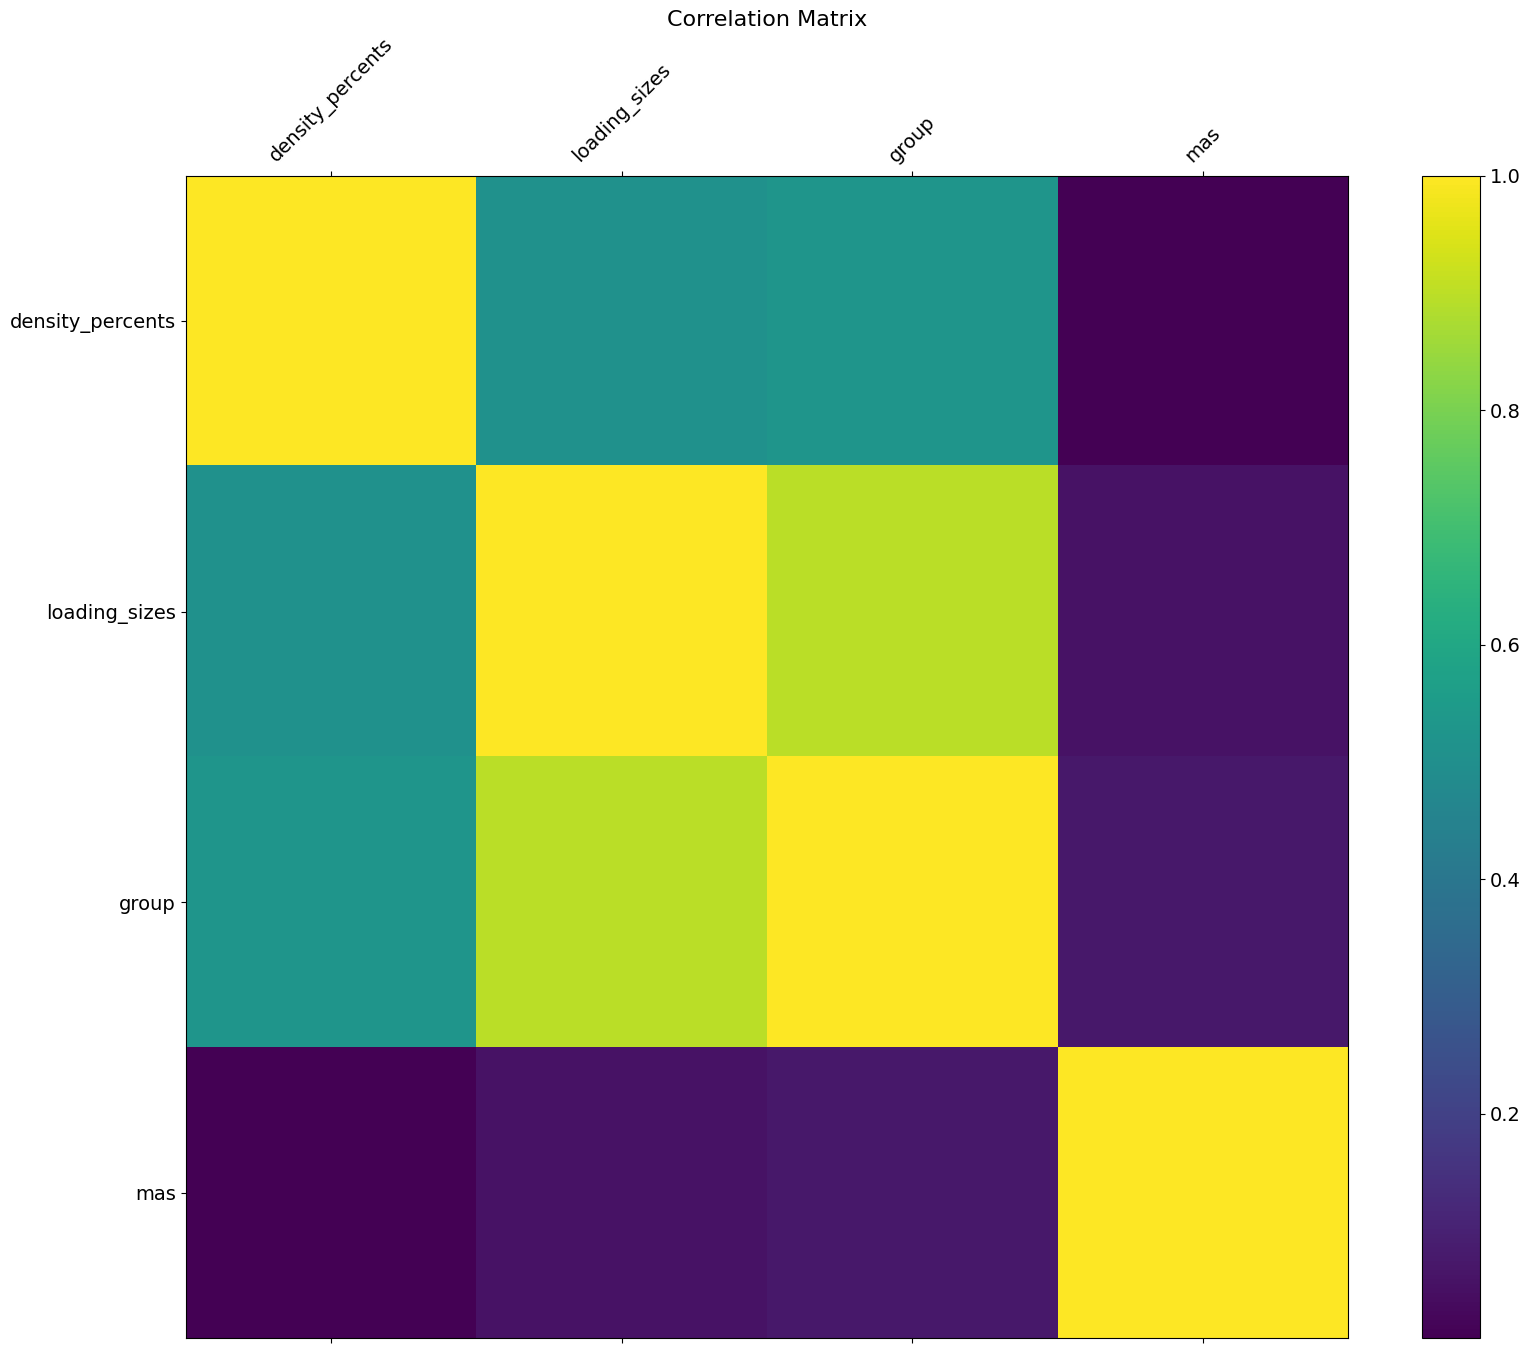

In [10]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

хорошая корреляция между group и loading sizes

<Axes: >

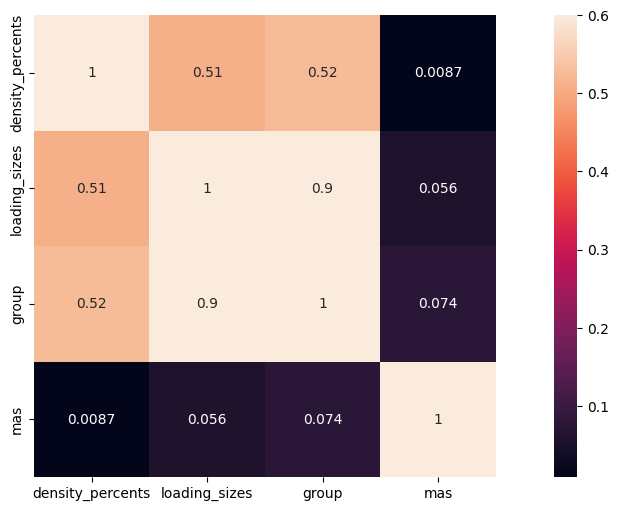

In [11]:
plt.figure(figsize=(15,6))
sea.heatmap(df.corr(), vmax=0.6, square=True, annot=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['density_percents']), df['density_percents'], test_size=0.2, random_state=123)

random_state - одинак. результаты на разных компах

In [13]:
clf = LinearRegression( n_jobs=-1)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

quality_metrics(y_test, preds)
r_sq = clf.score(X_test, y_test)
print('coefficient of determination:', r_sq)

explained_variance_score: 0.293262841
max_error: 0.628999229
mean_squared_error: 0.044498310
mean_absolute_error: 0.163088886
coefficient of determination: 0.27417010500618166


coefficient of determination - качество модели
n_jobs=-1 - на всех ядрах компа

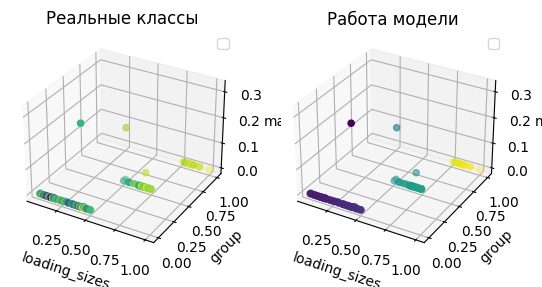

In [14]:
graph('loading_sizes', 'group', 'mas')

explained_variance_score: 0.324903584
max_error: 0.683370428
mean_squared_error: 0.042284625
mean_absolute_error: 0.154078479
coefficient of determination: 0.27417010500618166


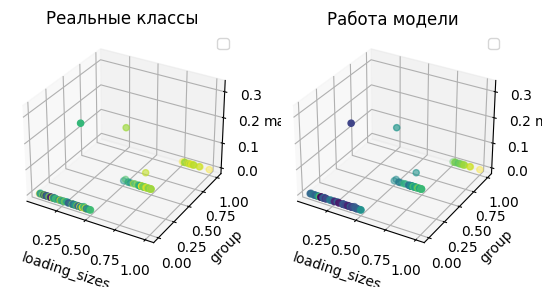

In [15]:
reg = KNeighborsRegressor(n_neighbors=9)
reg.fit(X_train, y_train)

preds = reg.predict(X_test)


quality_metrics(y_test, preds)
r_sq = clf.score(X_test, y_test)
print('coefficient of determination:', r_sq)
graph('loading_sizes', 'group', 'mas')

explained_variance_score: 0.308159914
max_error: 0.789601474
mean_squared_error: 0.043257821
mean_absolute_error: 0.132319228
coefficient of determination: 0.2944042217823566


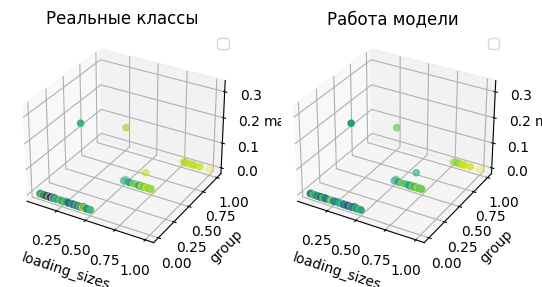

In [16]:
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(X_train, y_train)
preds = reg.predict(X_test)
quality_metrics(y_test, preds)
r_sq = reg.score(X_test, y_test)
print('coefficient of determination:', r_sq)
graph('loading_sizes', 'group', 'mas')

коэф детерминации низкий у всех моделей, следует поработь с параметрами модели и предобработать признаки

In [17]:
import xgboost as xb

In [18]:
params = {
    "objective": "reg:squarederror",
    "n_estimators":100,
    "max_depth": 4,
    "learning_rate": 0.01,
    "subsample": 0.8,
    "colsample_bytree": 0.9,
    "colsample_bylevel": 0.8,
    "reg_lambda": 0.1,
    "eval_metric": "rmse",
    "random_state": 42,
}

In [19]:
reg = xb.XGBRegressor()

In [20]:
reg.fit(X_train,
        y_train,
        verbose=False,
        eval_set= [(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds= 0.1
        )

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [21]:
results = reg.evals_result()

In [22]:
print(f'Determination: {reg.score(X_train, y_train, sample_weight=None)}')

Determination: 0.4572506972841134


In [23]:
print(f'Determination: {reg.score(X_test, y_test, sample_weight=None)}')

Determination: 0.2778550432968404


RMSE

In [24]:
results['validation_1']['rmse'][-1]

0.2105604486178035

validation_1 -  3 выборка,

In [25]:
best_iter = reg.best_iteration
best_iter

4

In [26]:
results['validation_1']['rmse'][best_iter]

0.210410072699963

MSE

In [27]:
y_pred = reg.predict(X_test)

mean_squared_error(y_test, y_pred, squared = False)

0.2104100727327081

RMSE during training

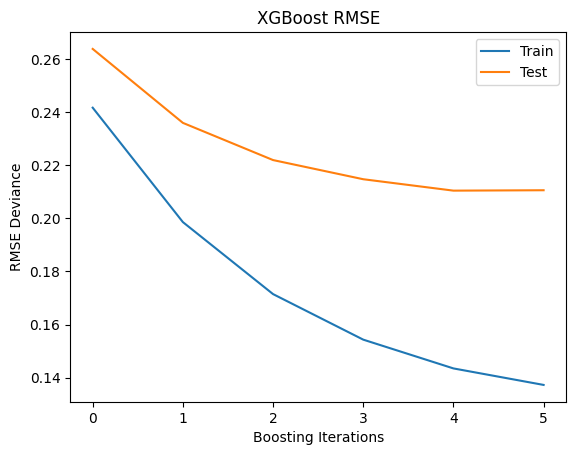

In [28]:
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')

plt.title('XGBoost RMSE')
plt.xlabel("Boosting Iterations")
plt.ylabel("RMSE Deviance")
plt.legend(loc="upper right");

Feature Importance

In [29]:
reg.feature_importances_

array([0.696306, 0.      , 0.303694], dtype=float32)

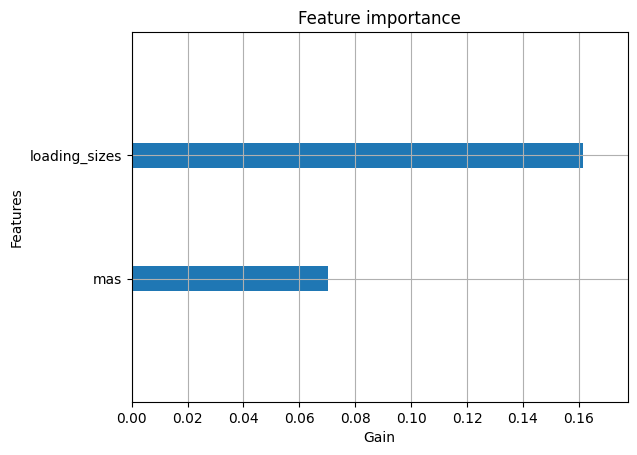

In [30]:
xb.plot_importance(reg,
                    importance_type="gain",
                    show_values=False,
                    xlabel="Gain");

Странно почему нет групп, ведь корреляция сильная была

Модели все не оч, но буст дал лучший результат. нужно поиграться с параметрами в моделях random/grid searchcv и найти лучшие. столб с группой лучше следует привести к бинарному виду (one hot coding),но тогда признаки увеличатся по числу значений в столбе группы, либо также нормализовать. он категориальный, а регрессия не очень хорошо работает с категориальными, хотя случайнsq лес нормально, как и буст.

One hot encoding

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
encoder = OneHotEncoder()
groups_2d = df['group'].values.reshape(-1, 1)
onehot_encoded = encoder.fit_transform(groups_2d)

# Convert the sparse matrix result to a DataFrame
onehot_encoded_df = pd.DataFrame(onehot_encoded.toarray(), columns=encoder.get_feature_names_out(['group']))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, onehot_encoded_df], axis=1)

# Drop the original 'group' column
df_encoded.drop(columns=['group'], inplace=True)

     density_percents  loading_sizes        mas  group_1.0  group_2.0  \
0            62.12352       61.22618      73.49        0.0        1.0   
1            64.88293       44.18843   18778.00        1.0        0.0   
2            64.41020       61.83379      13.50        0.0        1.0   
3            74.23567       67.92564      19.60        0.0        1.0   
4            59.31931       46.39305       0.00        1.0        0.0   
..                ...            ...        ...        ...        ...   
622          70.49989       42.56597  602358.00        1.0        0.0   
623          50.13860       29.89031       0.00        1.0        0.0   
624          75.85736       71.79583     100.00        0.0        1.0   
625          79.69262       77.77817      70.00        0.0        0.0   
626          96.81373       73.06696     410.00        0.0        1.0   

     group_3.0  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
..         ...  
622 

In [52]:
df_encoded.head()

,density_percents,loading_sizes,mas,group_1.0,group_2.0,group_3.0
0,62.12352,61.22618,73.49,0.0,1.0,0.0
1,64.88293,44.18843,18778.00,1.0,0.0,0.0
2,64.41020,61.83379,13.50,0.0,1.0,0.0
3,74.23567,67.92564,19.60,0.0,1.0,0.0
4,59.31931,46.39305,0.00,1.0,0.0,0.0


In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['density_percents']), df['density_percents'], test_size=0.2, random_state=123)

In [54]:
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(X_train, y_train)
preds = reg.predict(X_test)
quality_metrics(y_test, preds)
r_sq = reg.score(X_test, y_test)
print('coefficient of determination:', r_sq)

explained_variance_score: 0.313192685
max_error: 69.325933860
mean_squared_error: 333.075509576
mean_absolute_error: 11.661897733
coefficient of determination: 0.2988314042293865


Чуть больше стал score

In [55]:
params = {
    "objective": "reg:squarederror",
    "n_estimators":100,
    "max_depth": 4,
    "learning_rate": 0.01,
    "subsample": 0.8,
    "colsample_bytree": 0.9,
    "colsample_bylevel": 0.8,
    "reg_lambda": 0.1,
    "eval_metric": "rmse",
    "random_state": 42,
}

In [56]:
reg = xb.XGBRegressor()

In [57]:
reg.fit(X_train,
        y_train,
        verbose=False,
        eval_set= [(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds= 0.1
        )

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [58]:
print(f'Determination: {reg.score(X_train, y_train, sample_weight=None)}')

Determination: 0.4389150386465078


In [59]:
print(f'Determination: {reg.score(X_test, y_test, sample_weight=None)}')

Determination: 0.30066339788102037


На тестовой стал лучше, на трейне чуть хуже.